In [2]:
# Quick setup - Run this cell to recreate the main variables after kernel restart
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from nltk.corpus import stopwords
import string
from nltk.stem.porter import PorterStemmer
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
from sklearn.model_selection import train_test_split

# Download required NLTK data
nltk.download('punkt')
nltk.download('punkt_tab')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')

# Read and preprocess data
encodings = ['utf-8', 'iso-8859-1', 'windows-1252']
for encoding in encodings:
    try:
        df = pd.read_csv("spam.csv", encoding=encoding)
        print("File read successfully with encoding:", encoding)
        break
    except UnicodeDecodeError:
        print("Error reading file with encoding:", encoding)

# Data cleaning
df.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'],inplace=True)
df.rename(columns={'v1':'target','v2':'text'},inplace=True)
encoder = LabelEncoder()
df['target']=encoder.fit_transform(df['target'])
df=df.drop_duplicates(keep='first')

# Feature engineering
df['num_characters'] = df['text'].apply(len)
df['num_words'] = df['text'].apply(lambda x: len(nltk.word_tokenize(x)))
df['num_sentances'] = df['text'].apply(lambda x:len(nltk.sent_tokenize(x)))

# Text preprocessing function
ps = PorterStemmer()
def transform_text(text):
    text = text.lower()
    text = nltk.word_tokenize(text)
    
    y = []
    for i in text:
        if i.isalnum():
            y.append(i)
    
    text = y[:]
    y.clear()
    
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
            
    text = y[:]
    y.clear()
    
    for i in text:
        y.append(ps.stem(i))
    
    return " ".join(y)

# Apply text transformation
df['transformed_text'] = df['text'].apply(transform_text)

# Vectorization
tfidf = TfidfVectorizer(max_features=3000)
X = tfidf.fit_transform(df['transformed_text']).toarray()
y = df['target'].values

# Train test split
X_train,X_test,y_train,y_test=train_test_split(X,y, test_size=0.2,random_state=2)

print("Data setup completed!")
print(f"Dataset shape: {df.shape}")
print(f"X shape: {X.shape}")
print(f"Training set: {X_train.shape}, Testing set: {X_test.shape}")
print(f"Columns: {df.columns.tolist()}")

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\kumar\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\kumar\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\kumar\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\kumar\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\kumar\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


Error reading file with encoding: utf-8
File read successfully with encoding: iso-8859-1
Data setup completed!
Dataset shape: (5169, 6)
X shape: (5169, 3000)
Training set: (4135, 3000), Testing set: (1034, 3000)
Columns: ['target', 'text', 'num_characters', 'num_words', 'num_sentances', 'transformed_text']
Data setup completed!
Dataset shape: (5169, 6)
X shape: (5169, 3000)
Training set: (4135, 3000), Testing set: (1034, 3000)
Columns: ['target', 'text', 'num_characters', 'num_words', 'num_sentances', 'transformed_text']


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [31]:
import nltk
nltk.download('punkt')
nltk.download('punkt_tab')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\kumar\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\kumar\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt_tab.zip.
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\kumar\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt_tab.zip.
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\kumar\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\kumar\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\kumar\AppData\Roaming\nltk_data...
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\kumar\AppData\Roaming\nltk_data...
[nltk_data] Downloading packag

True

In [3]:
# df=pd.read_csv("spam.csv")


# df=pd.read_csv("spam.csv",encoding = 'utf-8')
# List of encodings to try
encodings = ['utf-8', 'iso-8859-1', 'windows-1252']

# Attempt to read the file with each encoding
for encoding in encodings:
    try:
        df = pd.read_csv("spam.csv", encoding=encoding)
        print("File read successfully with encoding:", encoding)
        # If successful, break out of the loop
        break
    except UnicodeDecodeError:
        print("Error reading file with encoding:", encoding)


Error reading file with encoding: utf-8
File read successfully with encoding: iso-8859-1


In [4]:
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [5]:
df.shape

(5572, 5)

In [6]:
# 1. DATA CLEANING
# 2. EDA
# 3. TEXT PREPROCESSING
# 4. MODEL BUILDING
# 5. EVALUATION
# 6. IMPROVEMENT
# 7.  WEBSITE
# 8. DEPLOYMENT


#### DATA CLEANING

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [8]:
df.isnull().sum()

v1               0
v2               0
Unnamed: 2    5522
Unnamed: 3    5560
Unnamed: 4    5566
dtype: int64

In [9]:
# drop last 3 cols
df.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'],inplace=True)

In [10]:
df.sample(5)

,v1,v2
4784,spam,Urgent -call 09066649731from Landline. Your co...
1389,ham,"Haha... Where got so fast lose weight, thk muz..."
2652,ham,No need for the drug anymore.
4349,ham,Yes. Rent is very expensive so its the way we ...
2855,ham,"Japanese Proverb: If one Can do it, U too Can ..."


In [11]:
# renaming the cols
df.rename(columns={'v1':'target','v2':'text'},inplace=True)

In [12]:
df.sample(5)

,target,text
5020,ham,:-( sad puppy noise
4911,ham,I am on the way to tirupur.
2346,ham,Its posible dnt live in &lt;#&gt; century cm ...
2210,ham,Just wanted to say holy shit you guys weren't ...
4868,ham,1. Tension face 2. Smiling face 3. Waste face ...


In [13]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()

In [14]:
df['target']=encoder.fit_transform(df['target'])    # where 0 indicat the not spam value and 1 indicate the spam value

In [15]:
df['target']

0       0
1       0
2       1
3       0
4       0
       ..
5567    1
5568    0
5569    0
5570    0
5571    0
Name: target, Length: 5572, dtype: int32

In [16]:
df.isnull().sum()

target    0
text      0
dtype: int64

In [17]:
# check duplicate value
df.duplicated().sum()

403

In [18]:
# remove duplicates value
df=df.drop_duplicates(keep='first')

In [19]:
df.duplicated().sum()

0

In [20]:
df.shape

(5169, 2)

### EDA

In [21]:
# check a ki kitna % data spam h ki nahi

df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [22]:
df['target'].value_counts()

target
0    4516
1     653
Name: count, dtype: int64

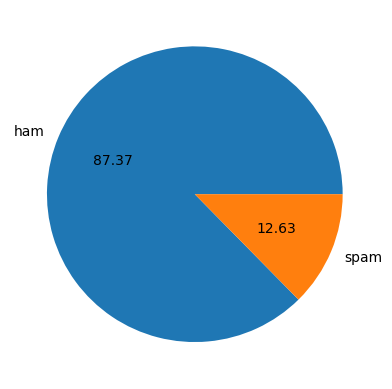

In [23]:
# %tage me agar data ko visuliza karna h to pie chart ka use karte h 


plt.pie(df['target'].value_counts(),labels=['ham','spam'],autopct="%0.2f")
plt.show()

In [24]:
# data is imbalanced

In [25]:
import nltk

In [26]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\kumar\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [27]:
# how to calculate a number of text

df['num_characters'] = df['text'].apply(len)

In [28]:
df['num_characters']

0       111
1        29
2       155
3        49
4        61
       ... 
5567    161
5568     37
5569     57
5570    125
5571     26
Name: num_characters, Length: 5169, dtype: int64

In [29]:
df.head()

,target,text,num_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [32]:
# Count number of words
df['num_words'] = df['text'].apply(lambda x: len(nltk.word_tokenize(x)))

print(df[['text', 'num_words']])

                                                   text  num_words
0     Go until jurong point, crazy.. Available only ...         24
1                         Ok lar... Joking wif u oni...          8
2     Free entry in 2 a wkly comp to win FA Cup fina...         37
3     U dun say so early hor... U c already then say...         13
4     Nah I don't think he goes to usf, he lives aro...         15
...                                                 ...        ...
5567  This is the 2nd time we have tried 2 contact u...         35
5568              Will Ì_ b going to esplanade fr home?          9
5569  Pity, * was in mood for that. So...any other s...         15
5570  The guy did some bitching but I acted like i'd...         27
5571                         Rofl. Its true to its name          7

[5169 rows x 2 columns]


In [33]:
df['num_words']

0       24
1        8
2       37
3       13
4       15
        ..
5567    35
5568     9
5569    15
5570    27
5571     7
Name: num_words, Length: 5169, dtype: int64

In [34]:
df.head()

,target,text,num_characters,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [35]:
# sentence tokenization
df['num_sentances'] = df['text'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [36]:
df['num_sentances']

0       2
1       2
2       2
3       1
4       1
       ..
5567    4
5568    1
5569    2
5570    1
5571    2
Name: num_sentances, Length: 5169, dtype: int64

In [37]:
df.head()

,target,text,num_characters,num_words,num_sentances
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [38]:
df[['num_characters','num_words','num_sentances']].describe()

,num_characters,num_words,num_sentances
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.455794,1.965564
std,58.236293,13.324758,1.448541
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [39]:
# ham
df[df['target']==0][['num_characters','num_words','num_sentances']].describe()

,num_characters,num_words,num_sentances
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [40]:
#spam

df[df['target']==1][['num_characters','num_words','num_sentances']].describe()

,num_characters,num_words,num_sentances
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


<Axes: xlabel='num_characters', ylabel='Count'>

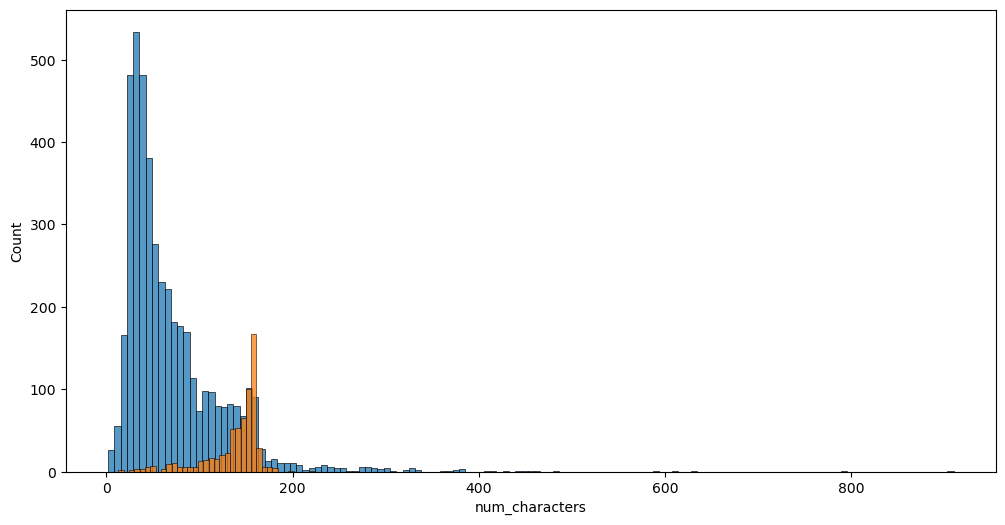

In [41]:
plt.figure(figsize=(12,6))

sns.histplot(df[df['target']==0]['num_characters']) # for ham
sns.histplot(df[df['target']==1]['num_characters'])   #for spam

<Axes: xlabel='num_words', ylabel='Count'>

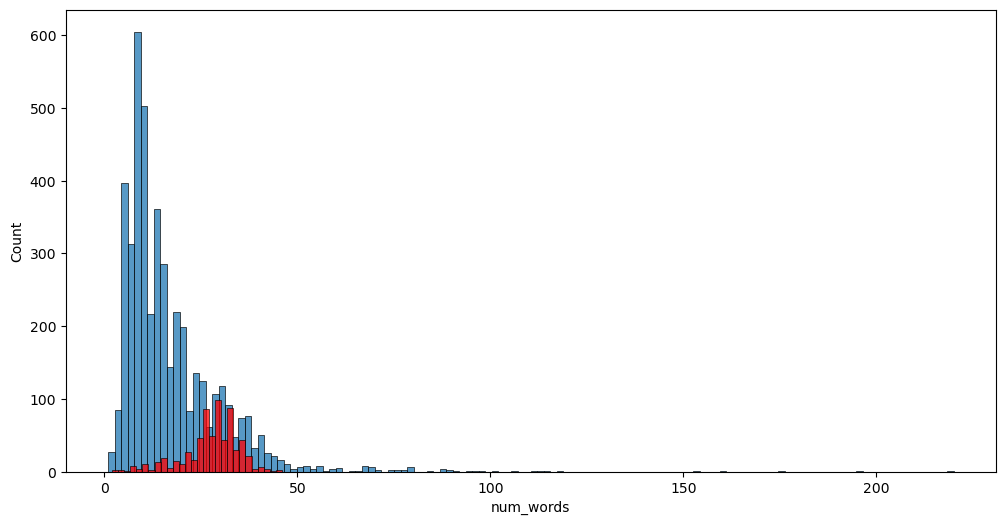

In [42]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['target']==0]['num_words']) # for ham
sns.histplot(df[df['target']==1]['num_words'],color='red')   #for spam

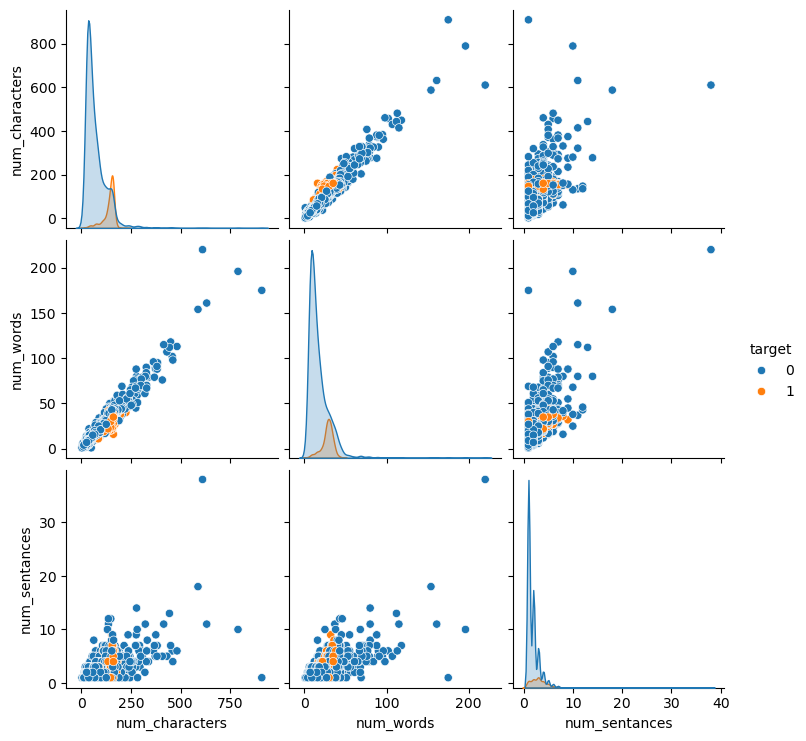

In [43]:
# check the relationship between n. of sentances and n. of words

sns.pairplot(df,hue='target')

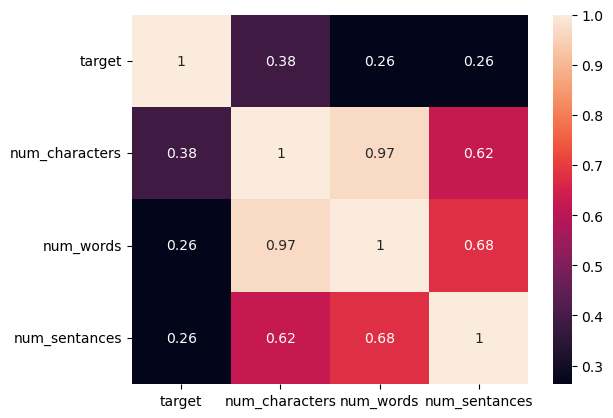

In [45]:
# data ke bich ke co-relation smjhne ke liye hm heatmap ka use kartey h 

# Select only numeric columns for correlation
numeric_cols = df.select_dtypes(include=[np.number])
sns.heatmap(numeric_cols.corr(),annot=True)
plt.show()

### 3. Data Preprocessing
  ### . Lower case
  ### . Tokenization
  ### . Removing special characters
  ### . Removing stop words and punctuation
  ### . Stemming

In [82]:
# ye sara steps es liye follow karenge kyu ki hamara jo data h o text format me h

In [46]:
from nltk.corpus import stopwords
stopwords.words('english')

['a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 "he'd",
 "he'll",
 'her',
 'here',
 'hers',
 'herself',
 "he's",
 'him',
 'himself',
 'his',
 'how',
 'i',
 "i'd",
 'if',
 "i'll",
 "i'm",
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it'd",
 "it'll",
 "it's",
 'its',
 'itself',
 "i've",
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'on

In [47]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [48]:
from nltk.stem.porter import PorterStemmer
ps=PorterStemmer()

In [49]:
def transform_text(text):
    text = text.lower()
    text = nltk.word_tokenize(text)
    
    y = []
    for i in text:
        if i.isalnum():
            y.append(i)
    
    text = y[:]
    y.clear()
    
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
            
    text = y[:]
    y.clear()
    
    for i in text:
        y.append(ps.stem(i))
    
            
    return " ".join(y)

In [50]:
transform_text("I'm gonna be home soon and i don't want to talk about this stuff anymore tonight, k? I've cried enough today.")


'gon na home soon want talk stuff anymor tonight k cri enough today'

In [51]:
df['text'][10]

"I'm gonna be home soon and i don't want to talk about this stuff anymore tonight, k? I've cried enough today."

In [52]:
ps.stem('loving')

'love'

In [53]:
df['transformed_text'] = df['text'].apply(transform_text)

In [54]:
df.head()

,target,text,num_characters,num_words,num_sentances,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [2]:
# make a word cloud(ye jonsbse importent words h un ko highlight kar ke dikhayega))

from wordcloud import WordCloud
import matplotlib.pyplot as plt
wc = WordCloud(width=500,height=500,min_font_size=10,background_color='white')

In [3]:
spam_wc = wc.generate(df[df['target'] == 1]['transformed_text'].str.cat(sep=" "))

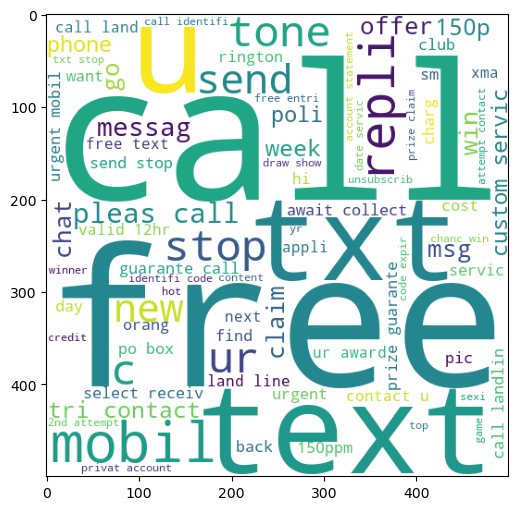

In [4]:
plt.figure(figsize=(15,6))
plt.imshow(spam_wc)

In [5]:
spam_wc = wc.generate(df[df['target'] == 0]['transformed_text'].str.cat(sep=" "))

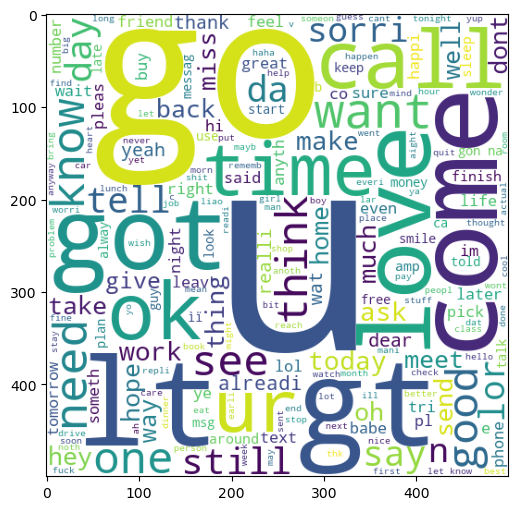

In [6]:
plt.figure(figsize=(15,6))    #for ham message
plt.imshow(spam_wc)

In [7]:
# jo vi spam msg h us me sab se jada kon sa words use ho raha h(top30 ya 50 words  find out kar rahe h)

spam_corpus = []
for msg in df[df['target'] == 1]['transformed_text'].tolist():
    for word in msg.split():
        spam_corpus.append(word)
        


In [8]:
len(spam_corpus)

9939

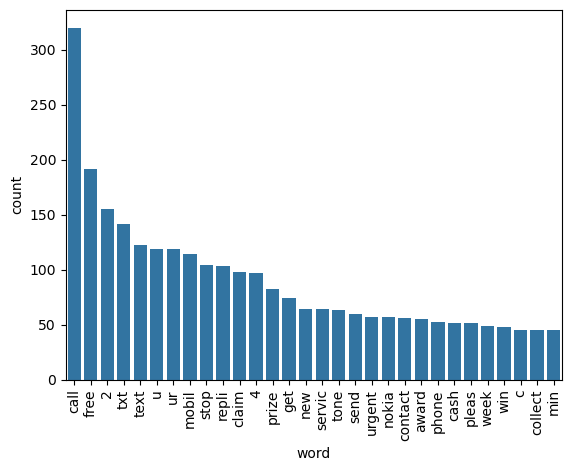

In [9]:
from collections import Counter
# sns.barplot(pd.DataFrame(Counter(spam_corpus).most_common(30))[0],pd.DataFrame(Counter(spam_corpus).most_common(30))[1])
# plt.xticks(rotation='vertical')
# plt.show()



# message me sabse jada use kiye jane wale words ka graph


# Assuming 'spam_corpus' is a list of words
word_counts = Counter(spam_corpus).most_common(30)
df_word_counts = pd.DataFrame(word_counts, columns=['word', 'count'])

# Plotting
sns.barplot(x='word', y='count', data=df_word_counts)
plt.xticks(rotation='vertical')
plt.show()

In [10]:
ham_corpus = []
for msg in df[df['target'] == 0]['transformed_text'].tolist():
    for word in msg.split():
        ham_corpus.append(word)

In [11]:

len(ham_corpus)

35404

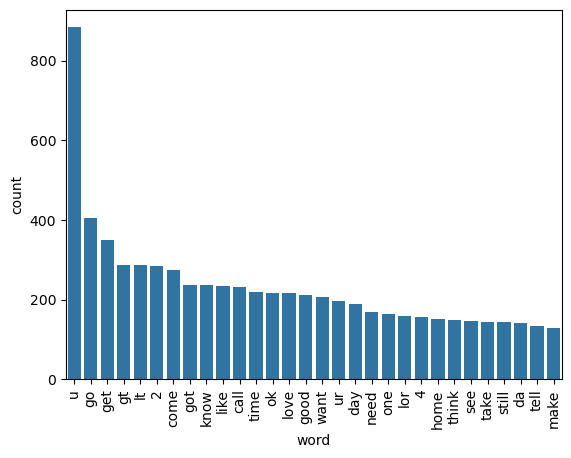

In [12]:
# Counting the 30 most common words in the ham_corpus
word_counts = Counter(ham_corpus).most_common(30)

# Converting the counts to a DataFrame
df_word_counts = pd.DataFrame(word_counts, columns=['word', 'count'])

# Plotting the data using seaborn's barplot
sns.barplot(x='word', y='count', data=df_word_counts)

# Rotating the x-axis labels for better readability
plt.xticks(rotation='vertical')

# Display the plot
plt.show()

### Model building

In [103]:
# text vectorization
# using bag of words
df.head()

,target,text,num_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [104]:
# convert the textual data in vector form




In [105]:
# perform the naive base model (because naive model gives me beeter performace on texture data)

In [13]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cv = CountVectorizer()
tfidf = TfidfVectorizer(max_features=3000)

In [14]:
X = tfidf.fit_transform(df['transformed_text']).toarray()

In [15]:
X.shape

(5169, 3000)

In [16]:
y = df['target'].values

In [17]:
from sklearn.model_selection import train_test_split

In [18]:
X_train,X_test,y_train,y_test=train_test_split(X,y, test_size=0.2,random_state=2)

In [19]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB

In [20]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [21]:
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

gnb.fit(X_train,y_train)
y_pred1 = gnb.predict(X_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))

0.8694390715667312
[[788 108]
 [ 27 111]]
0.5068493150684932


In [22]:
mnb.fit(X_train,y_train)
y_pred2 = mnb.predict(X_test)
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2))


0.9709864603481625
[[896   0]
 [ 30 108]]
1.0


In [23]:
bnb.fit(X_train,y_train)
y_pred3 = bnb.predict(X_test)
print(accuracy_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))
print(precision_score(y_test,y_pred3))

0.9835589941972921
[[895   1]
 [ 16 122]]
0.991869918699187


In [117]:
# tfidf--> MNB

In [3]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

In [4]:
svc = SVC(kernel='sigmoid', gamma=1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
abc = AdaBoostClassifier(n_estimators=50, random_state=2)
bc = BaggingClassifier(n_estimators=50, random_state=2)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50,random_state=2)
xgb = XGBClassifier(n_estimators=50,random_state=2)


In [5]:
clfs = {
    'SVC' : svc,
    'KN' : knc, 
    'NB': mnb, 
    'DT': dtc, 
    'LR': lrc, 
    'RF': rfc, 
    'AdaBoost': abc, 
    'BgC': bc, 
    'ETC': etc,
    'GBDT':gbdt,
    'xgb':xgb
}


In [8]:
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

def train_classifier(clf,X_train,y_train,X_test,y_test):
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred)
    
    return accuracy,precision

In [122]:
train_classifier(svc,X_train,y_train,X_test,y_test)

NameError: name 'X_train' is not defined

In [9]:
accuracy_scores = []
precision_scores = []

for name,clf in clfs.items():
    
    current_accuracy,current_precision = train_classifier(clf, X_train,y_train,X_test,y_test)
    
    print("For ",name)
    print("Accuracy - ",current_accuracy)
    print("Precision - ",current_precision)
    
    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)

For  SVC
Accuracy -  0.9758220502901354
Precision -  0.9747899159663865
For  KN
Accuracy -  0.9052224371373307
Precision -  1.0
For  NB
Accuracy -  0.9709864603481625
Precision -  1.0
For  KN
Accuracy -  0.9052224371373307
Precision -  1.0
For  NB
Accuracy -  0.9709864603481625
Precision -  1.0
For  DT
Accuracy -  0.9303675048355899
Precision -  0.8367346938775511
For  LR
Accuracy -  0.9584139264990329
Precision -  0.9702970297029703
For  DT
Accuracy -  0.9303675048355899
Precision -  0.8367346938775511
For  LR
Accuracy -  0.9584139264990329
Precision -  0.9702970297029703
For  RF
Accuracy -  0.9758220502901354
Precision -  0.9829059829059829
For  RF
Accuracy -  0.9758220502901354
Precision -  0.9829059829059829


c:\Users\kumar\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


For  AdaBoost
Accuracy -  0.960348162475822
Precision -  0.9292035398230089
For  BgC
Accuracy -  0.9584139264990329
Precision -  0.8682170542635659
For  BgC
Accuracy -  0.9584139264990329
Precision -  0.8682170542635659
For  ETC
Accuracy -  0.9748549323017408
Precision -  0.9745762711864406
For  ETC
Accuracy -  0.9748549323017408
Precision -  0.9745762711864406
For  GBDT
Accuracy -  0.9468085106382979
Precision -  0.9191919191919192
For  GBDT
Accuracy -  0.9468085106382979
Precision -  0.9191919191919192
For  xgb
Accuracy -  0.9671179883945842
Precision -  0.9482758620689655
For  xgb
Accuracy -  0.9671179883945842
Precision -  0.9482758620689655


In [10]:
performance_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy':accuracy_scores,'Precision':precision_scores}).sort_values('Precision',ascending=False)


In [11]:

performance_df

,Algorithm,Accuracy,Precision
1,KN,0.905222,1.000000
2,NB,0.970986,1.000000
5,RF,0.975822,0.982906
0,SVC,0.975822,0.974790
8,ETC,0.974855,0.974576
4,LR,0.958414,0.970297
10,xgb,0.967118,0.948276
6,AdaBoost,0.960348,0.929204
9,GBDT,0.946809,0.919192
7,BgC,0.958414,0.868217


In [126]:
performance_df1 = pd.melt(performance_df, id_vars = "Algorithm")

NameError: name 'performance_df' is not defined

In [127]:

performance_df1

NameError: name 'performance_df1' is not defined

In [128]:
sns.catplot(x = 'Algorithm', y='value', 
               hue = 'variable',data=performance_df1, kind='bar',height=5)
plt.ylim(0.5,1.0)
plt.xticks(rotation='vertical')
plt.show()

NameError: name 'performance_df1' is not defined

In [129]:
# model improve
# 1. Change the max_features parameter of TfIdf

In [90]:
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_max_ft_3000':accuracy_scores,'Precision_max_ft_3000':precision_scores}).sort_values('Precision_max_ft_3000',ascending=False)

In [91]:
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_scaling':accuracy_scores,'Precision_scaling':precision_scores}).sort_values('Precision_scaling',ascending=False)


In [92]:

new_df = performance_df.merge(temp_df,on='Algorithm')

In [93]:

new_df_scaled = new_df.merge(temp_df,on='Algorithm')

In [94]:
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_num_chars':accuracy_scores,'Precision_num_chars':precision_scores}).sort_values('Precision_num_chars',ascending=False)

In [95]:

new_df_scaled.merge(temp_df,on='Algorithm')

,Algorithm,Accuracy,Precision,Accuracy_scaling_x,Precision_scaling_x,Accuracy_scaling_y,Precision_scaling_y,Accuracy_num_chars,Precision_num_chars
0,KN,0.905222,1.000000,0.905222,1.000000,0.905222,1.000000,0.905222,1.000000
1,NB,0.970986,1.000000,0.970986,1.000000,0.970986,1.000000,0.970986,1.000000
2,RF,0.975822,0.982906,0.975822,0.982906,0.975822,0.982906,0.975822,0.982906
3,SVC,0.975822,0.974790,0.975822,0.974790,0.975822,0.974790,0.975822,0.974790
4,ETC,0.974855,0.974576,0.974855,0.974576,0.974855,0.974576,0.974855,0.974576
5,LR,0.958414,0.970297,0.958414,0.970297,0.958414,0.970297,0.958414,0.970297
6,AdaBoost,0.960348,0.929204,0.960348,0.929204,0.960348,0.929204,0.960348,0.929204
7,xgb,0.967118,0.926230,0.967118,0.926230,0.967118,0.926230,0.967118,0.926230
8,GBDT,0.946809,0.919192,0.946809,0.919192,0.946809,0.919192,0.946809,0.919192
9,BgC,0.958414,0.868217,0.958414,0.868217,0.958414,0.868217,0.958414,0.868217


In [96]:
# Voting Classifier
svc = SVC(kernel='sigmoid', gamma=1.0,probability=True)
mnb = MultinomialNB()
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)

from sklearn.ensemble import VotingClassifier

In [97]:
voting = VotingClassifier(estimators=[('svm', svc), ('nb', mnb), ('et', etc)],voting='soft')

In [119]:

voting.fit(X_train,y_train)

VotingClassifier(estimators=[('svm',
                              SVC(gamma=1.0, kernel='sigmoid',
                                  probability=True)),
                             ('nb', MultinomialNB()),
                             ('et',
                              ExtraTreesClassifier(n_estimators=50,
                                                   random_state=2))],
                 voting='soft')

In [120]:
y_pred = voting.predict(X_test)
print("Accuracy",accuracy_score(y_test,y_pred))
print("Precision",precision_score(y_test,y_pred))

Accuracy 0.9816247582205029
Precision 0.9917355371900827


In [121]:
# Applying stacking
estimators=[('svm', svc), ('nb', mnb), ('et', etc)]
final_estimator=RandomForestClassifier()

In [122]:

from sklearn.ensemble import StackingClassifier

In [123]:
clf = StackingClassifier(estimators=estimators, final_estimator=final_estimator)

In [126]:
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
print("Accuracy",accuracy_score(y_test,y_pred))
print("Precision",precision_score(y_test,y_pred))

Accuracy 0.9787234042553191
Precision 0.9393939393939394


In [12]:
import pickle
pickle.dump(tfidf,open('vectorizer.pkl','wb'))
pickle.dump(mnb,open('model.pkl','wb'))
